En el mundo de los gráficos por computadora, los filtros anisotrópicos juegan un papel crucial para mejorar la calidad de las imágenes, especialmente en texturas que se observan desde ángulos oblicuos. A diferencia de filtros como el Gaussian Blur, que difuminan uniformemente la imagen, los filtros anisotrópicos adaptan su efecto según la orientación de la textura, preservando los detalles y reduciendo el aliasing de manera más inteligente.

##### ¿Qué los diferencia del Gaussian Blur?

La principal diferencia radica en su enfoque. El Gaussian Blur aplica una convolución con un kernel circular sobre la imagen, difuminando los bordes y detalles por igual en todas las direcciones. Esto puede ser útil para suavizar la imagen general, pero no distingue entre detalles importantes y texturas irrelevantes.

En cambio, los filtros anisotrópicos analizan la orientación de la textura y adaptan el proceso de filtrado en consecuencia. De esta manera, pueden preservar los detalles finos en direcciones paralelas a la textura, mientras que difuminan suavemente los bordes irregulares en direcciones perpendiculares. Esto resulta en texturas más nítidas y realistas, especialmente cuando se observan desde ángulos oblicuos.

##### Funcionamiento del Filtro Anisotrópico de Perona-Malik:

Uno de los filtros anisotrópicos más conocidos es el de Perona-Malik, que se basa en la difusión no lineal. Este enfoque simula la difusión de calor en un material anisotrópico, donde la conductividad térmica depende de la orientación del material.

En el contexto de las texturas, el filtro de Perona-Malik asigna diferentes pesos a los píxeles vecinos según su orientación relativa a la textura. Los píxeles que se encuentran en la dirección de la textura tienen un peso mayor, lo que permite preservar los detalles finos. Por otro lado, los píxeles en direcciones perpendiculares tienen un peso menor, lo que contribuye a difuminar los bordes irregulares.

##### Implementación y Beneficios:

La implementación del filtro de Perona-Malik implica la resolución de una ecuación diferencial que describe la difusión del calor anisotrópico. Esta ecuación se resuelve iterativamente, ajustando los valores de los píxeles de acuerdo a las interacciones con sus vecinos.

##### Los beneficios del uso de filtros anisotrópicos como el de Perona-Malik son notables:

Texturas más nítidas y realistas, especialmente desde ángulos oblicuos.
Reducción del aliasing en bordes y detalles finos.
Mejora general de la calidad de la imagen.


In [11]:
""" import cv2
import os
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import io, img_as_float
import numpy as np

def convertir_y_filtrar_imagenes(directorio):
    for archivo in os.listdir(directorio):
        if archivo.endswith(('.jpg', '.png')):
            ruta_completa = os.path.join(directorio, archivo)
            # Leer la imagen
            imagen = cv2.imread(ruta_completa)
            # Convertir a escala de grises
            gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
            # Convertir a formato flotante
            imagen_flotante = img_as_float(gris)
            # Aplicar el filtro anisotrópico
            imagen_filtrada = denoise_nl_means(imagen_flotante, h=1.0, sigma=0.1, fast_mode=True)
            # Guardar la imagen resultante
            cv2.imwrite(os.path.join('./Descargas_BSDS500/filtered', archivo), imagen_filtrada * 255)

directorio_imagenes = './Descargas_BSDS500/imgs'
convertir_y_filtrar_imagenes(directorio_imagenes)
 """

" import cv2\nimport os\nfrom skimage.restoration import denoise_nl_means, estimate_sigma\nfrom skimage import io, img_as_float\nimport numpy as np\n\ndef convertir_y_filtrar_imagenes(directorio):\n    for archivo in os.listdir(directorio):\n        if archivo.endswith(('.jpg', '.png')):\n            ruta_completa = os.path.join(directorio, archivo)\n            # Leer la imagen\n            imagen = cv2.imread(ruta_completa)\n            # Convertir a escala de grises\n            gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)\n            # Convertir a formato flotante\n            imagen_flotante = img_as_float(gris)\n            # Aplicar el filtro anisotrópico\n            imagen_filtrada = denoise_nl_means(imagen_flotante, h=1.0, sigma=0.1, fast_mode=True)\n            # Guardar la imagen resultante\n            cv2.imwrite(os.path.join('./Descargas_BSDS500/filtered', archivo), imagen_filtrada * 255)\n\ndirectorio_imagenes = './Descargas_BSDS500/imgs'\nconvertir_y_filtrar_imagen

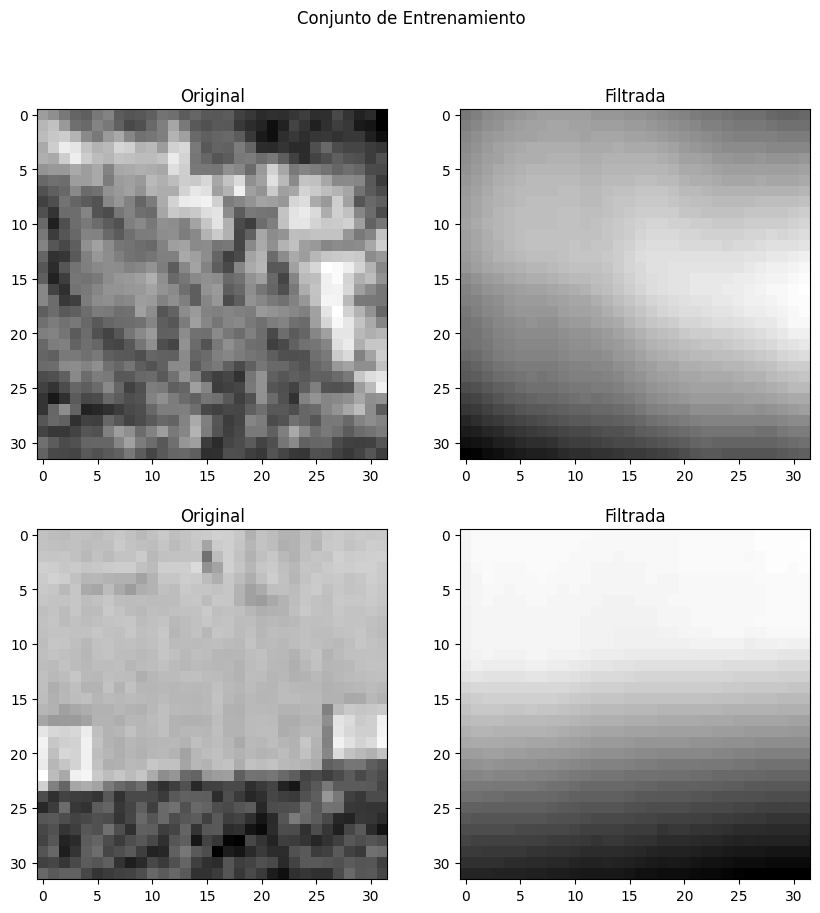

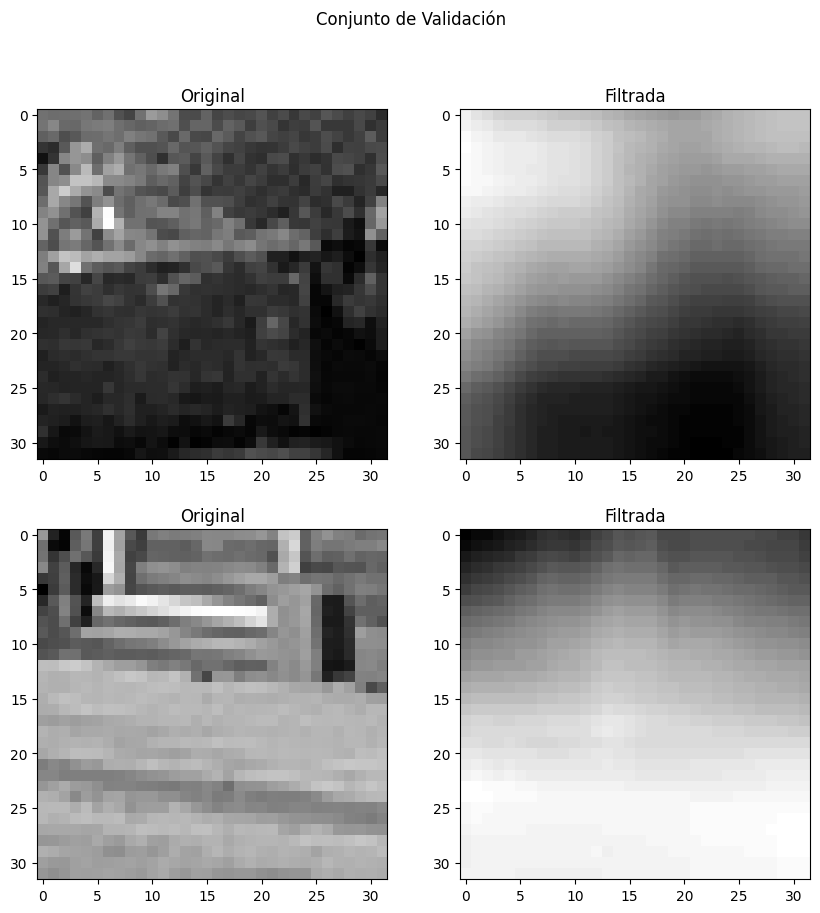

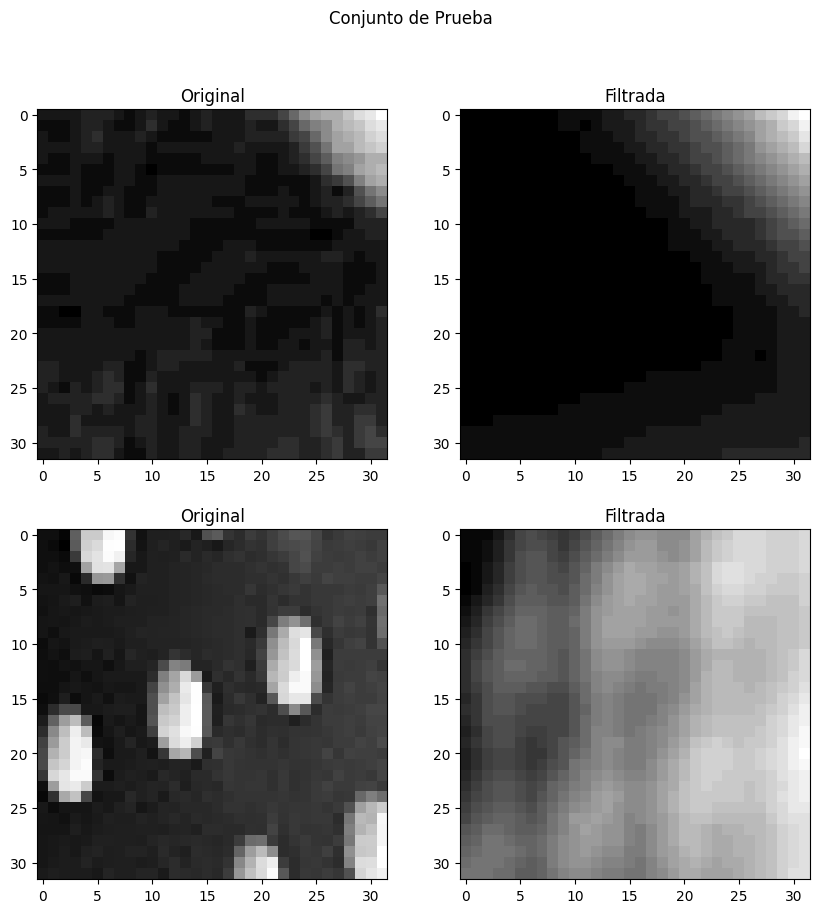

Conjunto de entrenamiento: (60000, 32, 32) (60000, 32, 32)
Conjunto de validación: (20000, 32, 32) (20000, 32, 32)
Conjunto de prueba: (20000, 32, 32) (20000, 32, 32)


In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def extraer_ventanas_pareadas(img, filtered_img, k=32, num_ventanas=10):
    max_x, max_y = img.shape[0] - k, img.shape[1] - k
    x_ventanas = []
    y_ventanas = []
    for _ in range(num_ventanas):
        x = np.random.randint(0, max_x)
        y = np.random.randint(0, max_y)
        ventana_img = img[x:x+k, y:y+k]
        ventana_filtered_img = filtered_img[x:x+k, y:y+k]
        x_ventanas.append(ventana_img)
        y_ventanas.append(ventana_filtered_img)
    return x_ventanas, y_ventanas

def cargar_imagenes_y_extraer_ventanas(directorio_imgs, directorio_filtered, k=32, num_ventanas=10):
    x_data = []
    y_data = []
    archivos = os.listdir(directorio_imgs)
    for archivo in archivos:
        if archivo.endswith('.jpg') or archivo.endswith('.png'):
            img_path = os.path.join(directorio_imgs, archivo)
            filtered_path = os.path.join(directorio_filtered, archivo)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            filtered_img = cv2.imread(filtered_path, cv2.IMREAD_GRAYSCALE)
            x_ventanas, y_ventanas = extraer_ventanas_pareadas(img, filtered_img, k, num_ventanas)
            x_data.extend(x_ventanas)
            y_data.extend(y_ventanas)
    return np.array(x_data), np.array(y_data)

# Definición de directorios
directorio_imgs = './Descargas_BSDS500/imgs'
directorio_filtered = './Descargas_BSDS500/filtered'

# Extraer datos
x_data, y_data = cargar_imagenes_y_extraer_ventanas(directorio_imgs, directorio_filtered, k=32, num_ventanas=500)

# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

def mostrar_ejemplos(x, y, title="Ejemplos"):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()
    for i in range(0, 4, 2):
        axs[i].imshow(x[i // 2], cmap='gray')
        axs[i].set_title('Original')
        axs[i+1].imshow(y[i // 2], cmap='gray')
        axs[i+1].set_title('Filtrada')
    plt.suptitle(title)
    plt.show()

# Mostrar ejemplos de cada conjunto
mostrar_ejemplos(x_train[:2], y_train[:2], "Conjunto de Entrenamiento")
mostrar_ejemplos(x_val[:2], y_val[:2], "Conjunto de Validación")
mostrar_ejemplos(x_test[:2], y_test[:2], "Conjunto de Prueba")
print("Conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Conjunto de validación:", x_val.shape, y_val.shape)
print("Conjunto de prueba:", x_test.shape, y_test.shape)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation

def unet(input_size=(32, 32, 1)):
    inputs = Input(input_size)
    # Down 1
    conv1 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # Down 2
    conv2 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Middle
    conv3 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    
    # Up 2
    up2 = UpSampling2D(size=(2, 2))(conv3)
    up2 = concatenate([conv2, up2], axis=3)
    conv4 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(up2)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    
    # Up 1
    up1 = UpSampling2D(size=(2, 2))(conv4)
    up1 = concatenate([conv1, up1], axis=3)
    conv5 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(up1)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    
    # Output
    conv6 = Conv2D(1, 1, activation='sigmoid')(conv5)

    model = Model(inputs=[inputs], outputs=[conv6])
    return model

# Crear la red U-Net
model = unet()
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 32, 32, 32)           320       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_10 (Ba  (None, 32, 32, 32)           128       ['conv2d_11[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_10 (Activation)  (None, 32, 32, 32)           0         ['batch_normalization_10

Epoch 1/50
1875/1875 [==============================] - 427s 227ms/step - loss: 14240.7002 - val_loss: 14262.0879
Epoch 2/50
1875/1875 [==============================] - 345s 184ms/step - loss: 14237.5244 - val_loss: 14262.0547
Epoch 3/50
1875/1875 [==============================] - 329s 175ms/step - loss: 14237.5293 - val_loss: 14262.0527
Epoch 4/50
1875/1875 [==============================] - 338s 180ms/step - loss: 14237.5186 - val_loss: 14262.0527
Epoch 5/50
1875/1875 [==============================] - 331s 177ms/step - loss: 14237.5273 - val_loss: 14262.0527
Epoch 6/50
1875/1875 [==============================] - 342s 182ms/step - loss: 14237.5127 - val_loss: 14262.0527
Epoch 7/50
1875/1875 [==============================] - 342s 183ms/step - loss: 14237.5225 - val_loss: 14262.0527
Epoch 8/50
1875/1875 [==============================] - 363s 194ms/step - loss: 14237.5273 - val_loss: 14262.0527
Epoch 9/50
1875/1875 [==============================] - 417s 222ms/step - loss: 14237.52

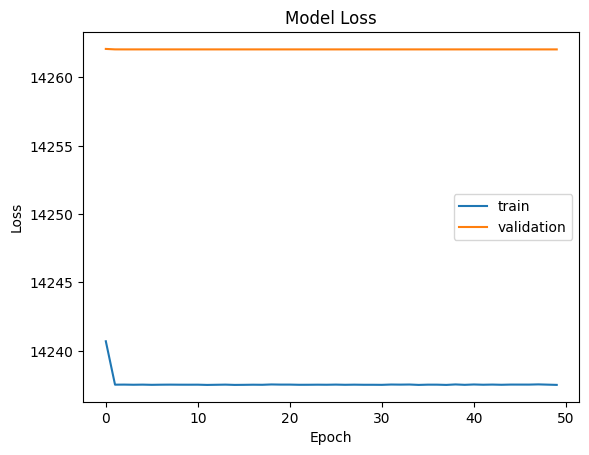

In [14]:
# Suponiendo que x_train, y_train, x_val, y_val están predefinidos como numpy arrays adecuados
# Asegúrate de que las imágenes tengan la forma correcta
x_train = np.expand_dims(x_train, axis=-1)  # Añadir un canal
y_train = np.expand_dims(y_train, axis=-1)  # Añadir un canal
x_val = np.expand_dims(x_val, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

# Entrenar el modelo
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=50)

# Visualizar el progreso del entrenamiento
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [15]:
model.save('unet.h5')

c:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
